#Comparison of Model Fits: BAT AGN

This notebook compares the fits and best fit parameters for each model fitting to see the systematic differences based on which model is used. The three models are from Casey 2012, Mullaney et al 2011 (DecompIR), and Dale et al 2014.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(context='notebook', style='darkgrid', color_codes=True, palette='deep')

In [2]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior.csv', index_col=0)
bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3', 'IC1657', 'IC2461',
                        'MCG-01-05-047', 'NGC788', 'NGC2655',
                        'NGC3718', 'NGC4939', 'NGC4941',
                        'NGC5033', 'NGC4235', 'CenA'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

First lets compare the total IR luminosity integrated from 8-1000 micron. This will give us an idea of the systematic differences in the SFR based on the model used.

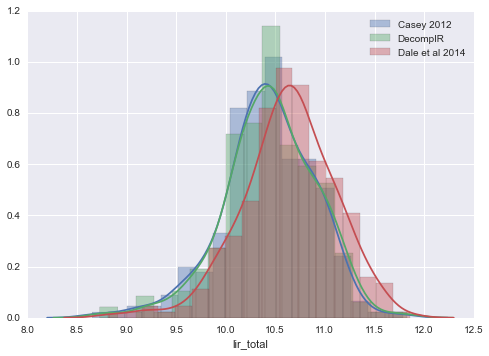

In [3]:
sn.distplot(bat_casey['lir_total'])
sn.distplot(bat_decompir['lir_total'])
sn.distplot(bat_dale14['lir_total'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])

In general based on the distribution it looks like the Casey and DecompIR models give virtually the same total IR luminosity. It looks like the Dale et al 2014 model gives slightly higher luminosity by maybe 0.2 dex. 

In [4]:
bat_casey['lir_total'].describe()

count    260.000000
mean      10.426538
std        0.467504
min        8.654362
25%       10.171949
50%       10.438516
75%       10.758858
max       11.783195
Name: lir_total, dtype: float64

In [5]:
bat_decompir['lir_total'].describe()

count    260.000000
mean      10.451979
std        0.466131
min        8.730080
25%       10.180317
50%       10.461925
75%       10.783989
max       11.825043
Name: lir_total, dtype: float64

In [6]:
bat_dale14['lir_total'].describe()

count    260.000000
mean      10.628941
std        0.472659
min        8.812794
25%       10.363680
50%       10.649049
75%       10.934418
max       11.856718
Name: lir_total, dtype: float64

Yup the Dale+14 model gives slightly higher total luminosity with log(LIR) ~ 10.6 compared to 10.4 for the other two models. Not sure why though. It amounts to about a 60% increase in the total IR luminosity.

This is only a statistical comparison, lets see how they do on an individual source basis.

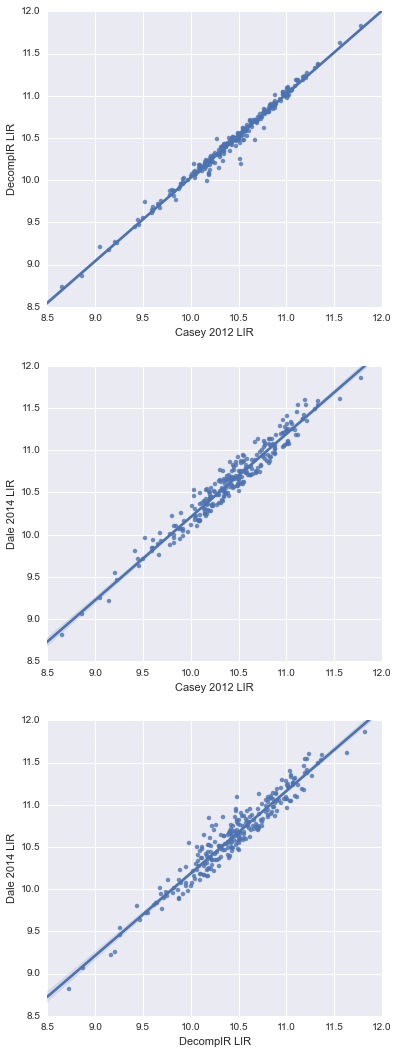

In [7]:
fig = plt.figure(figsize=(6, 18))
ax1 = fig.add_subplot(311)
sn.regplot(bat_casey['lir_total'], bat_decompir['lir_total'], ax=ax1)
ax1.set_xlim(8.5, 12.0)
ax1.set_ylim(8.5, 12.0)
ax1.set_xlabel('Casey 2012 LIR')
ax1.set_ylabel('DecompIR LIR')

ax2 = fig.add_subplot(312)
sn.regplot(bat_casey['lir_total'], bat_dale14['lir_total'], ax=ax2)
ax2.set_xlim(8.5, 12.0)
ax2.set_ylim(8.5, 12.0)
ax2.set_xlabel('Casey 2012 LIR')
ax2.set_ylabel('Dale 2014 LIR')

ax3 = fig.add_subplot(313)
sn.regplot(bat_decompir['lir_total'], bat_dale14['lir_total'], ax=ax3)
ax3.set_xlim(8.5, 12.0)
ax3.set_ylim(8.5, 12.0)
ax3.set_xlabel('DecompIR LIR')
ax3.set_ylabel('Dale 2014 LIR')

Based on my visual interpretation, they all look very correlated. The relationship with the least scatter though seems to be between the Casey and DecompIR fits. 

We can do a quick linear regression between each model to see what the slope, intercept, and scatter is around each relationship.

In [8]:
from scipy.stats import linregress

In [9]:
casey_decompir_linregress = linregress(x=bat_casey['lir_total'], y=bat_decompir['lir_total'])
casey_dale14_linregress = linregress(x=bat_casey['lir_total'], y=bat_dale14['lir_total'])
decompir_dale14_linregress = linregress(x=bat_decompir['lir_total'], y=bat_dale14['lir_total'])

In [10]:
print 'Casey vs DecompIR:'
print 'Slope: ', casey_decompir_linregress[0]
print 'Intercept: ', casey_decompir_linregress[1]
print 'R-Squared: ', casey_decompir_linregress[2]**2
print 'P-value: ', casey_decompir_linregress[3]
print 'Standard Error: ', casey_decompir_linregress[4]
print ''
print 'Casey vs Dale14:'
print 'Slope: ', casey_dale14_linregress[0]
print 'Intercept: ', casey_dale14_linregress[1]
print 'R-Squared: ', casey_dale14_linregress[2]**2
print 'P-value: ', casey_dale14_linregress[3]
print 'Standard Error: ', casey_dale14_linregress[4]
print ''
print 'DecompIR vs Dale14:'
print 'Slope: ', decompir_dale14_linregress[0]
print 'Intercept: ', decompir_dale14_linregress[1]
print 'R-Squared: ', decompir_dale14_linregress[2]**2
print 'P-value: ', decompir_dale14_linregress[3]
print 'Standard Error: ', decompir_dale14_linregress[4]

Casey vs DecompIR:
Slope:  0.989297297989
Intercept:  0.137032279518
R-Squared:  0.984484734683
P-value:  2.02775843911e-235
Standard Error:  0.00773200417797

Casey vs Dale14:
Slope:  0.984872567335
Intercept:  0.360128969682
R-Squared:  0.948934422011
P-value:  1.13643847505e-168
Standard Error:  0.0142238188745

DecompIR vs Dale14:
Slope:  0.97554420795
Intercept:  0.432573480347
R-Squared:  0.92558154791
P-value:  1.44267804306e-147
Standard Error:  0.0172214642297


All of the relationships are highly linear with all three slopes above 0.975. The Casey vs. DecompIR regression has the smallest standard error at 0.008 meaning the  two IR luminosities are extremely well correlated.

As I noticed from the KDE plots, the Dale+14 model produces a higher IR luminosity since the intercepts are well above 0 at 0.36 and 0.43 dex. 

Next I want to look at the correlations of the AGN fraction.

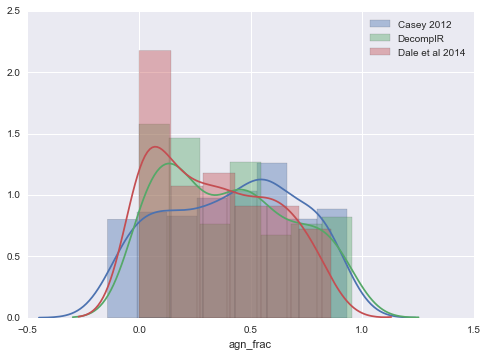

In [11]:
sn.distplot(bat_casey['agn_frac'])
sn.distplot(bat_decompir['agn_frac'])
sn.distplot(bat_dale14['agn_frac'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])

Clearly there are some sources with the Casey model that have negative AGN fraction. Let's assume all of these sources have 0 AGN fraction.

In [12]:
bat_casey.loc[(bat_casey['agn_frac'] < 0), 'agn_frac'] = 0

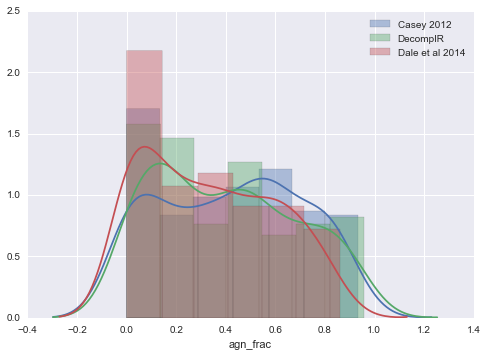

In [13]:
sn.distplot(bat_casey['agn_frac'])
sn.distplot(bat_decompir['agn_frac'])
sn.distplot(bat_dale14['agn_frac'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])

Even after moving all of the sources that had negative AGN fraction into the 0% bin, it still results in the Casey model having more sources at higher AGN fraction. There is a clear bump around 0.6 AGN fraction for the Casey model. Both the DecompIR and Dale+14 models show similar distributions in their AGN fractions.

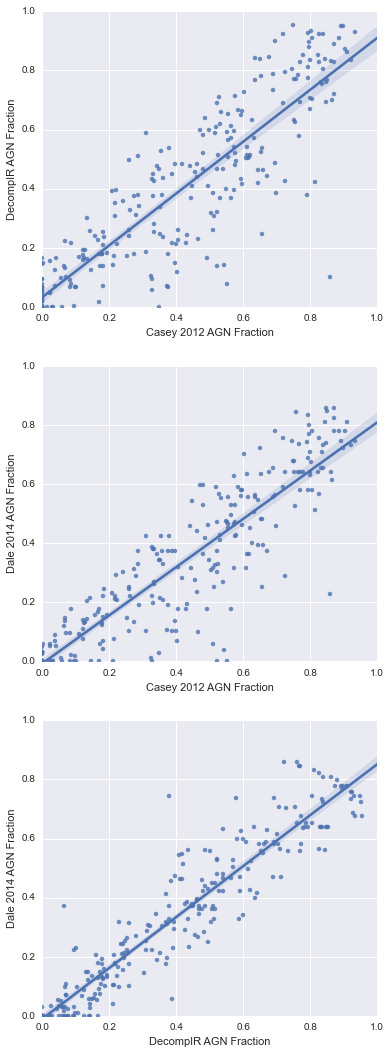

In [14]:
fig = plt.figure(figsize=(6, 18))
ax1 = fig.add_subplot(311)
sn.regplot(bat_casey['agn_frac'], bat_decompir['agn_frac'], ax=ax1)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Casey 2012 AGN Fraction')
ax1.set_ylabel('DecompIR AGN Fraction')

ax2 = fig.add_subplot(312)
sn.regplot(bat_casey['agn_frac'], bat_dale14['agn_frac'], ax=ax2)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Casey 2012 AGN Fraction')
ax2.set_ylabel('Dale 2014 AGN Fraction')

ax3 = fig.add_subplot(313)
sn.regplot(bat_decompir['agn_frac'], bat_dale14['agn_frac'], ax=ax3)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_xlabel('DecompIR AGN Fraction')
ax3.set_ylabel('Dale 2014 AGN Fraction')

It looks like the DecompIR and Dale 2014 AGN fractions agree the best. Lets look at the differences between each AGN fractions. Interestingly however at high AGN fractions (greater than about 0.6) the Casey model seems to be underestimating the AGN fraction.

In [15]:
diff_casey_decompir = bat_casey['agn_frac'] - bat_decompir['agn_frac']
diff_casey_dale = bat_casey['agn_frac'] - bat_dale14['agn_frac']
diff_decompir_dale = bat_decompir['agn_frac'] - bat_dale14['agn_frac']

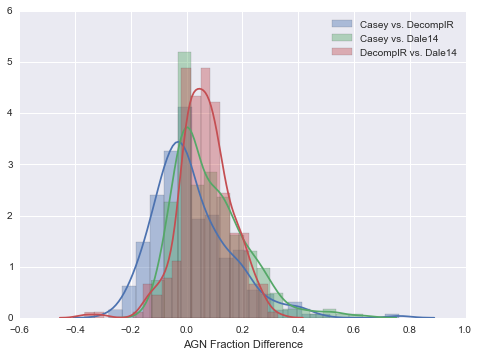

In [16]:
sn.distplot(diff_casey_decompir)
sn.distplot(diff_casey_dale)
sn.distplot(diff_decompir_dale)
plt.legend(['Casey vs. DecompIR', 'Casey vs. Dale14', 'DecompIR vs. Dale14'])
plt.xlabel('AGN Fraction Difference')

It looks like the Casey vs. DecompIR and Casey vs. Dale distributions peak at 0 which is good. The DecompIR vs. Dale14 distribution however peaks around 0.1 AGN fraction meaning DecompIR has systematically higher AGN fractions than the Dale model by about 0.1.

I want to see if there are any trends with AGN fraction though in terms of the difference. Like I said before it looked like at high AGN fraction the Casey model was systematically underestimating the DecompIR AGN fraction.

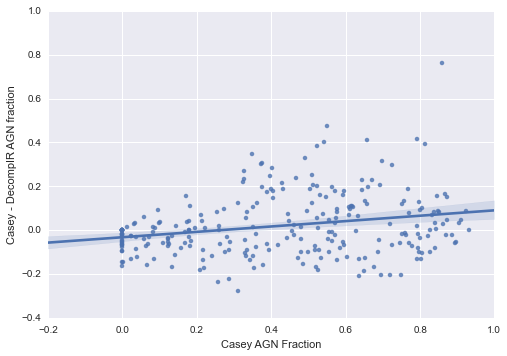

In [28]:
sn.regplot(bat_casey['agn_frac'], diff_casey_decompir)
plt.ylabel('Casey - DecompIR AGN fraction')
plt.xlabel('Casey AGN Fraction')

Hmmm its not quite clear based on this plot. Maybe a slight trend up.

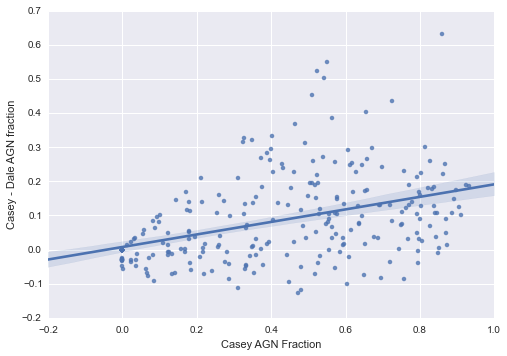

In [18]:
sn.regplot(bat_casey['agn_frac'], diff_casey_dale)
plt.ylabel('Casey - Dale AGN fraction')
plt.xlabel('Casey AGN Fraction')

Here there seems to a bit of a clear trend towards a larger difference between the Casey and Dale models in terms of their AGN fraction as you get to higher AGN fraction.

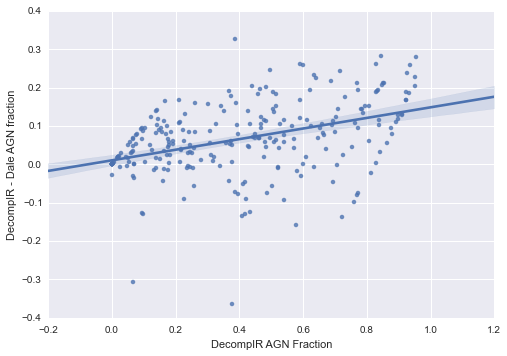

In [21]:
sn.regplot(bat_decompir['agn_frac'], diff_decompir_dale)
plt.ylabel('DecompIR - Dale AGN fraction')
plt.xlabel('DecompIR AGN Fraction')

For the Dale and DecompIR models, its not quite clear.

Let's find out the mean, median, and standard deviation for the differences in AGN fraction for the 3 models.

In [23]:
diff_casey_decompir.describe()


count    260.000000
mean       0.018959
std        0.141364
min       -0.279452
25%       -0.071324
50%       -0.004294
75%        0.092452
max        0.760834
Name: agn_frac, dtype: float64

In [25]:
diff_casey_dale.describe()

count    260.000000
mean       0.084896
std        0.128138
min       -0.126963
25%       -0.003091
50%        0.053252
75%        0.152749
max        0.631071
Name: agn_frac, dtype: float64

In [27]:
diff_decompir_dale.describe()

count    260.000000
mean       0.065936
std        0.094430
min       -0.365105
25%        0.004035
50%        0.061656
75%        0.119373
max        0.327466
Name: agn_frac, dtype: float64

There are several things going on here. One is we are looking at the difference between the AGN fractions for two models. So the mean and median are telling us how close each model is to the other on average. In this case the two models that closest to each other on average is the Casey 2012 and DecompIR models with an average difference of 0.02 and median difference of -0.004. On the other hand the two models that have the smallest dispersion of differences is the DecompIR and Dale models meaning that apart from the systematic shift of about 6% between the two, the AGN fractions from the these two models don't vary very much. We can see this in the above plots where I plotted the correlations between each AGN fraction. The DecompIR and Dale models are more tightly correlated around their linear regression line, but its systematically offset from a 1:1 correlation. Let's specifically look at the regression between each AGN fraction.

In [28]:
casey_decompir_agnFrac_linregress = linregress(x=bat_casey['agn_frac'], y=bat_decompir['agn_frac'])
casey_dale14_agnFrac_linregress = linregress(x=bat_casey['agn_frac'], y=bat_dale14['agn_frac'])
decompir_dale14_agnFrac_linregress = linregress(x=bat_decompir['agn_frac'], y=bat_dale14['agn_frac'])

In [29]:
print 'AGN Fraction Linear Regression'
print 'Casey vs DecompIR:'
print 'Slope: ', casey_decompir_agnFrac_linregress[0]
print 'Intercept: ', casey_decompir_agnFrac_linregress[1]
print 'R-Squared: ', casey_decompir_agnFrac_linregress[2]**2
print 'P-value: ', casey_decompir_agnFrac_linregress[3]
print 'Standard Error: ', casey_decompir_agnFrac_linregress[4]
print ''
print 'Casey vs Dale14:'
print 'Slope: ', casey_dale14_agnFrac_linregress[0]
print 'Intercept: ', casey_dale14_agnFrac_linregress[1]
print 'R-Squared: ', casey_dale14_agnFrac_linregress[2]**2
print 'P-value: ', casey_dale14_agnFrac_linregress[3]
print 'Standard Error: ', casey_dale14_agnFrac_linregress[4]
print ''
print 'DecompIR vs Dale14:'
print 'Slope: ', decompir_dale14_agnFrac_linregress[0]
print 'Intercept: ', decompir_dale14_agnFrac_linregress[1]
print 'R-Squared: ', decompir_dale14_agnFrac_linregress[2]**2
print 'P-value: ', decompir_dale14_agnFrac_linregress[3]
print 'Standard Error: ', decompir_dale14_agnFrac_linregress[4]

AGN Fraction Linear Regression
Casey vs DecompIR:
Slope:  0.877363885747
Intercept:  0.032665845526
R-Squared:  0.76784831781
P-value:  8.65236434773e-84
Standard Error:  0.0300343404831

Casey vs Dale14:
Slope:  0.816159547513
Intercept:  -0.00750577676012
R-Squared:  0.796888751029
P-value:  2.76865484733e-91
Standard Error:  0.0256527159709

DecompIR vs Dale14:
Slope:  0.861763916435
Intercept:  -0.010364947168
R-Squared:  0.89065240936
P-value:  5.33383501021e-126
Standard Error:  0.0187987485165


So we can see that the DecompIR and Dale 2014 models have the largest R-squared values and smallest Standard Error. This should also come out in the correlation coefficients.

In [30]:
from scipy.stats import pearsonr

In [34]:
casey_decompir_agnFrac_cc = pearsonr(bat_casey['agn_frac'], bat_decompir['agn_frac'])
casey_dale_agnFrac_cc = pearsonr(bat_casey['agn_frac'], bat_dale14['agn_frac'])
decompir_dale_agnFrac_cc = pearsonr(bat_decompir['agn_frac'], bat_dale14['agn_frac'])

In [37]:
print 'AGN Fraction Correlation Coefficients'
print 'Casey vs DecompIR:'
print 'Pearson CC: ', casey_decompir_agnFrac_cc[0]
print ''
print 'Casey vs Dale14:'
print 'Pearson CC: ', casey_dale_agnFrac_cc[0]
print ''
print 'DecompIR vs Dale14:'
print 'Pearson CC: ', decompir_dale_agnFrac_cc[0]

AGN Fraction Correlation Coefficients
Casey vs DecompIR:
Pearson CC:  0.876269546321

Casey vs Dale14:
Pearson CC:  0.892686255651

DecompIR vs Dale14:
Pearson CC:  0.943743826131


Indeed the correlation coefficient for the DecompIR and Dale 2014 models is significantly higher than for the Casey model with them.

Let's look at some of the sources that seem to be outliers between the Casey model and the other two. I'll make a cutoff of a difference in AGN fraction of 20% to find the sources since that seems to the general spread in the differences between the models. 

In [39]:
ind_outliers = (diff_casey_decompir > 0.2) & (diff_casey_dale > 0.2)
bat_casey[ind_outliers]

,agn_frac,agn_frac_16,agn_frac_84,alpha,alpha_16,alpha_84,lir_bb,lir_bb_16,lir_bb_84,lir_powlaw,...,mdust_84,norm_pow,norm_pow_16,norm_pow_84,tdust,tdust_16,tdust_84,wturn,wturn_16,wturn_84
Name,,,,,,,,,,,,,,,,,,,,,
2MASXJ09043699+5536025,0.655956,0.303827,0.800996,2.180954,1.831039,2.634072,9.561997,9.328994,9.812396,10.020706,...,7.254159,-0.482988,-0.820157,-0.328018,25.557123,17.508899,30.472897,51.928823,37.202376,66.044586
CGCG341-006,0.491623,0.251224,0.541361,2.085781,1.822776,2.555367,10.669961,10.617740,10.829410,10.880207,...,7.791846,0.180477,-0.063830,0.379715,27.481240,23.606300,29.961082,55.437275,37.964819,77.589830
ESO439-G009,0.523064,0.488528,0.556298,1.815186,1.497533,2.197098,10.060581,10.025944,10.086247,10.314796,...,8.140183,0.122617,0.046095,0.192406,18.386629,17.735361,19.073709,54.065538,45.919940,66.483982
ESO490-IG026,0.723501,0.644950,0.748245,2.179353,1.899511,2.552171,10.199217,10.140140,10.288942,10.781531,...,7.888236,0.653496,0.601269,0.696640,21.666890,20.301909,23.095537,54.699266,46.390241,65.742230
Fairall51,0.813992,0.791685,0.836736,1.679900,1.432635,2.036094,9.668407,9.621472,9.713377,10.458562,...,7.676116,0.718060,0.669122,0.772725,19.242545,18.004074,20.523385,60.076822,50.432046,72.719257
MCG+02-57-002,0.859971,0.797898,0.892565,1.864598,1.752689,2.002480,9.429539,9.309140,9.607599,10.360072,...,8.081160,0.192580,0.146798,0.237300,15.203004,13.767869,16.921415,90.240478,78.630630,100.159765
MCG-01-40-001,0.550570,0.472792,0.614664,2.781854,2.493506,3.198864,10.256140,10.193100,10.317536,10.549882,...,8.122536,0.608550,0.553693,0.663081,20.176951,19.059104,21.368444,54.315853,45.928402,65.961013
MCG-02-08-014,0.671126,0.621234,0.710968,1.808658,1.568611,2.101896,9.269483,9.205540,9.317979,9.754387,...,7.613943,-0.078589,-0.124028,-0.038345,16.914101,15.957919,17.999496,62.468054,53.462964,75.358268
Mrk10,0.401283,0.341808,0.439511,1.982534,1.754550,2.311074,10.334690,10.299984,10.378658,10.423530,...,8.473553,0.153431,0.097876,0.199196,17.947568,17.326049,18.572418,63.178169,52.526488,76.489375


There are 20 sources that have an AGN fraction difference greater than 20% when comparing the Casey model to both the DecompIR and Dale 2014 models. Looking through all of the SED plots there seem to be two distinct groups that caused a major difference between the modeling. One are sources that have quite cold dust with T < 20 K. The other is sources that are starburst-like meaning they have very broad IR SEDs with lots of MIR emission (i.e. hot dust) that is likely more related to star formation rather than AGN. The MIR slope is very steep as well. A good example is Mrk 18. So lets look at the distribution of fitted dust temperatures for these sources and see if we see a bimodality.

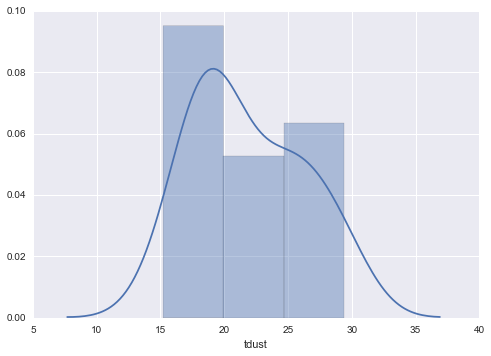

In [42]:
sn.distplot(bat_casey['tdust'][ind_outliers])

Its hard to see because we have so few sources. Lets look at the host galaxy templates that were used in DecompIR for these sources. We should see a large percentage with the SB4, SB5, and Arp220 template.

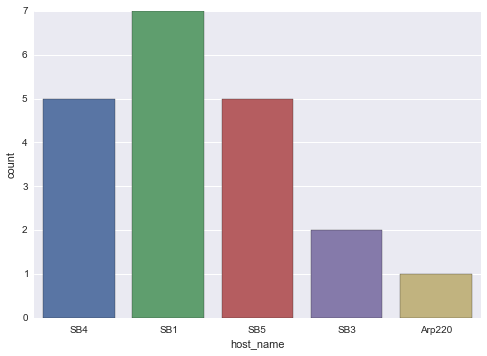

In [48]:
sn.countplot(bat_decompir['host_name'][ind_outliers])

We can see there is a much larger fraction of sources that are fit with the SB4 and SB5 template for the outlier sources. Let's see which of the sources these are.

In [106]:
ind_out_sb = (((bat_decompir['host_name'] == 'SB5') | (bat_decompir['host_name'] == 'SB4') |
              (bat_decompir['host_name'] == 'SB3') | (bat_decompir['host_name'] == 'Arp220')) &
              ind_outliers)
ind_out_cold = (~ind_out_sb) & (ind_outliers)
bat_casey[ind_out_sb]

,agn_frac,agn_frac_16,agn_frac_84,alpha,alpha_16,alpha_84,lir_bb,lir_bb_16,lir_bb_84,lir_powlaw,...,tdust_16,tdust_84,wturn,wturn_16,wturn_84,LAGN_IR,LSF,LBAT,LNeII,LPAH
Name,,,,,,,,,,,,,,,,,,,,,
2MASXJ09043699+5536025,0.655956,0.303827,0.800996,2.180954,1.831039,2.634072,9.561997,9.328994,9.812396,10.020706,...,17.508899,30.472897,51.928823,37.202376,66.044586,9.272486e+09,4.863351e+09,4.880628e+43,NaN,NaN
CGCG341-006,0.491623,0.251224,0.541361,2.085781,1.822776,2.555367,10.669961,10.617740,10.829410,10.880207,...,23.606300,29.961082,55.437275,37.964819,77.589830,6.030413e+10,6.235911e+10,5.815136e+43,NaN,NaN
ESO490-IG026,0.723501,0.644950,0.748245,2.179353,1.899511,2.552171,10.199217,10.140140,10.288942,10.781531,...,20.301909,23.095537,54.699266,46.390241,65.742230,5.519530e+10,2.109385e+10,5.278622e+43,NaN,NaN
Fairall51,0.813992,0.791685,0.836736,1.679900,1.432635,2.036094,9.668407,9.621472,9.713377,10.458562,...,18.004074,20.523385,60.076822,50.432046,72.719257,2.719160e+10,6.213632e+09,1.826533e+43,5.154080e+40,2.066153e+41
MCG+02-57-002,0.859971,0.797898,0.892565,1.864598,1.752689,2.002480,9.429539,9.309140,9.607599,10.360072,...,13.767869,16.921415,90.240478,78.630630,100.159765,2.201626e+10,3.584907e+09,2.746410e+43,NaN,NaN
MCG-01-40-001,0.550570,0.472792,0.614664,2.781854,2.493506,3.198864,10.256140,10.193100,10.317536,10.549882,...,19.059104,21.368444,54.315853,45.928402,65.961013,2.945973e+10,2.404800e+10,3.840888e+43,NaN,NaN
Mrk18,0.522467,0.103372,0.769850,2.388803,1.988156,2.588693,9.651115,9.356376,9.898071,9.904484,...,19.596233,28.822879,78.106553,45.887504,86.342903,6.532945e+09,5.971096e+09,3.357694e+42,4.678754e+40,2.196262e+41
NGC1125,0.373255,0.219335,0.512841,3.038617,2.401469,3.668791,9.942935,9.864259,10.028680,9.995010,...,26.100867,31.245279,36.113320,26.655967,47.738866,6.962862e+09,1.169158e+10,4.653073e+42,NaN,NaN
NGC4507,0.698522,0.679080,0.743072,1.793505,1.550607,2.142038,9.996653,9.932560,10.023415,10.531017,...,20.144693,21.836174,59.420991,50.052831,70.477599,3.065614e+10,1.323098e+10,5.867353e+43,1.051754e+41,1.785173e+41


13/20 of the sources have a more starburst-like SED. Let's replot the AGN fraction correlations with these sources highlighted.

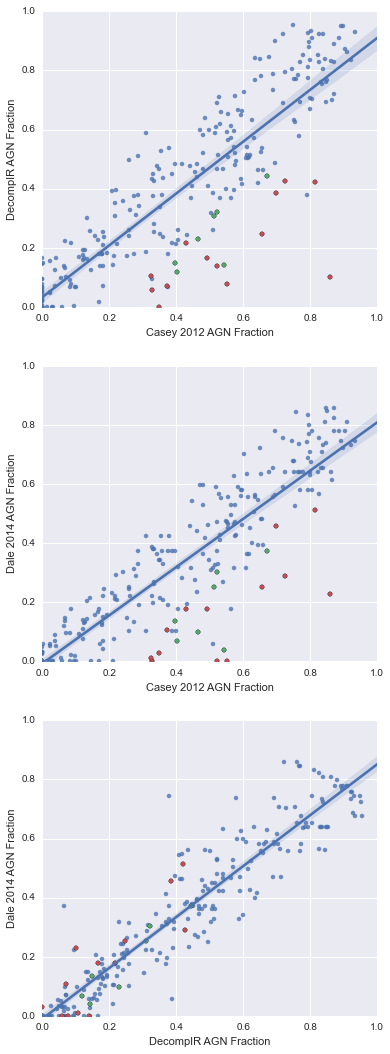

In [108]:
fig = plt.figure(figsize=(6, 18))
ax1 = fig.add_subplot(311)
sn.regplot(bat_casey['agn_frac'], bat_decompir['agn_frac'], ax=ax1)
plt.scatter(bat_casey['agn_frac'][ind_out_sb], bat_decompir['agn_frac'][ind_out_sb], c='r')
plt.scatter(bat_casey['agn_frac'][ind_out_cold], bat_decompir['agn_frac'][ind_out_cold], c='g')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Casey 2012 AGN Fraction')
ax1.set_ylabel('DecompIR AGN Fraction')

ax2 = fig.add_subplot(312)
sn.regplot(bat_casey['agn_frac'], bat_dale14['agn_frac'], ax=ax2)
plt.scatter(bat_casey['agn_frac'][ind_out_sb], bat_dale14['agn_frac'][ind_out_sb], c='r')
plt.scatter(bat_casey['agn_frac'][ind_out_cold], bat_dale14['agn_frac'][ind_out_cold], c='g')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Casey 2012 AGN Fraction')
ax2.set_ylabel('Dale 2014 AGN Fraction')

ax3 = fig.add_subplot(313)
sn.regplot(bat_decompir['agn_frac'], bat_dale14['agn_frac'], ax=ax3)
plt.scatter(bat_decompir['agn_frac'][ind_out_sb], bat_dale14['agn_frac'][ind_out_sb], c='r')
plt.scatter(bat_decompir['agn_frac'][ind_out_cold], bat_dale14['agn_frac'][ind_out_cold], c='g')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_xlabel('DecompIR AGN Fraction')
ax3.set_ylabel('Dale 2014 AGN Fraction')

Clearly removing these sources would reduce some of the outliers between the Casey model AGN fractions and the DecompIR and Dale et al 2014 AGN fractions. Now the question though is which model is correct? I think the only way to answer that is to maybe look at the correlation with X-ray luminosity. 

First I need to calculate the AGN IR luminosity for the Casey model since we don't have that yet. Also I need to get the BAT luminosity.

In [58]:
bat_casey['LAGN_IR'] = 10**(bat_casey['lir_powlaw']) - 1./3.*(10**(bat_casey['lir_bb']))
bat_casey['LSF'] = 4./3.*10**(bat_casey['lir_bb'])

In [61]:
bat_flux = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_bat_flux.csv', index_col=0)
bat_info = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_info.csv', index_col=0)

bat_casey['LBAT'] = 4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']
bat_decompir['LBAT'] = 4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']
bat_dale14['LBAT'] = 4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']

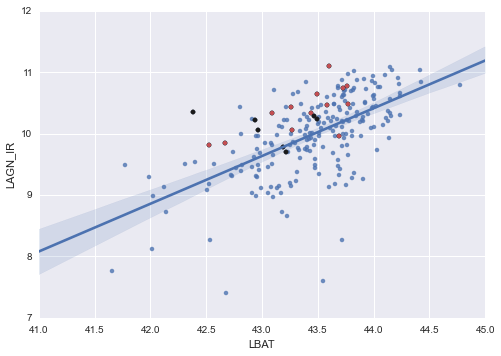

In [113]:
sn.regplot(np.log10(bat_casey['LBAT']), np.log10(bat_casey['LAGN_IR']))
plt.scatter(np.log10(bat_casey['LBAT'][ind_out_sb]), np.log10(bat_casey['LAGN_IR'][ind_out_sb]), c='r')
plt.scatter(np.log10(bat_casey['LBAT'][ind_out_cold]), np.log10(bat_casey['LAGN_IR'][ind_out_cold]), c='k')

In [65]:
bat_decompir['LAGN_IR'] = np.log10(bat_decompir['agn_frac']*10**(bat_decompir['lir_total']))
bat_decompir['LSF'] = np.log10((1-bat_decompir['agn_frac'])*10**(bat_decompir['lir_total']))

In [66]:
bat_dale14['LAGN_IR'] = np.log10(bat_dale14['agn_frac']*10**(bat_dale14['lir_total']))
bat_dale14['LSF'] = np.log10((1-bat_dale14['agn_frac'])*10**(bat_dale14['lir_total']))

(7.5, 11.5)

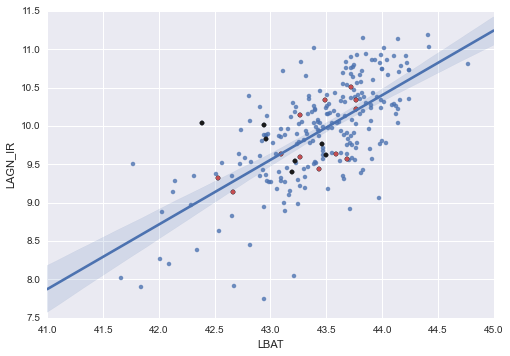

In [114]:
sn.regplot(np.log10(bat_decompir['LBAT'][bat_decompir['LAGN_IR'] > 5.0]), bat_decompir['LAGN_IR'][bat_decompir['LAGN_IR'] > 5.0])
plt.scatter(np.log10(bat_decompir['LBAT'][ind_out_sb]), bat_decompir['LAGN_IR'][ind_out_sb], c='r')
plt.scatter(np.log10(bat_decompir['LBAT'][ind_out_cold]), bat_decompir['LAGN_IR'][ind_out_cold], c='k')
plt.ylim(7.5, 11.5)

(7.5, 11.5)

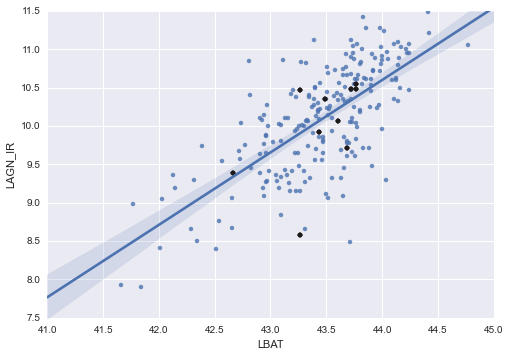

In [115]:
sn.regplot(np.log10(bat_dale14['LBAT'][np.isfinite(bat_dale14['LAGN_IR'])]), bat_dale14['LAGN_IR'][np.isfinite(bat_dale14['LAGN_IR'])])
plt.scatter(np.log10(bat_dale14['LBAT'][ind_out_sb]), bat_dale14['LAGN_IR'][ind_out_sb], c='r')
plt.scatter(np.log10(bat_dale14['LBAT'][ind_out_sb]), bat_dale14['LAGN_IR'][ind_out_sb], c='k')

plt.ylim(7.5, 11.5)

So it looks like for the Casey model, if we compare where these 'starburst-like' sources lie against the linear regression curve for the whole sample, nearly all of them lie above the regression line. Whereas for the other two models they are scattered about the regression line.

Another thing we can check is how well their star-forming luminosity is correlated with other SFR indicators. For that we do have NeII line emission or PAH line emission. In this case we would be comparing the star-forming luminosity with the MIR line emission instead of comparing AGN indicators. I need to see for how many of these sources we have these measurements.

The line emission data is contained in my 'bat-data' Github repository named 'bat_mir_lines.csv'.

In [83]:
bat_mir_lines = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_mir_lines.csv', index_col=0)
bat_mir_lines['Dist'] = bat_info['Dist_[Mpc]']

In [84]:
bat_casey['LNeII'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['NeII']*10**7
bat_decompir['LNeII'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['NeII']*10**7
bat_dale14['LNeII'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['NeII']*10**7

bat_casey['LPAH'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['PAH 11.25']*10**7
bat_decompir['LPAH'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['PAH 11.25']*10**7
bat_dale14['LPAH'] = 4*np.pi*(bat_mir_lines['Dist']*10**6*3.09e18)**2*bat_mir_lines['PAH 11.25']*10**7

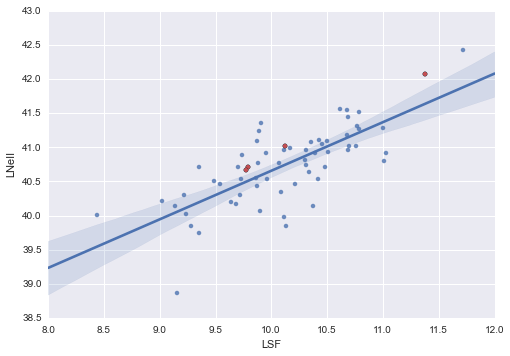

In [87]:
sn.regplot(np.log10(bat_casey['LSF']), np.log10(bat_casey['LNeII']))
plt.scatter(np.log10(bat_casey['LSF'][ind_out_sb]), np.log10(bat_casey['LNeII'][ind_out_sb]), c='r')

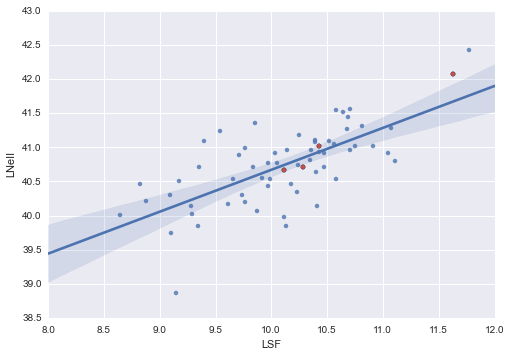

In [90]:
sn.regplot(bat_decompir['LSF'], np.log10(bat_decompir['LNeII']))
plt.scatter(bat_decompir['LSF'][ind_out_sb], np.log10(bat_decompir['LNeII'][ind_out_sb]), c='r')

(38.5, 43.0)

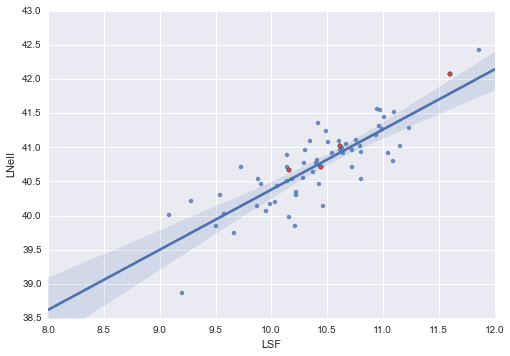

In [165]:
plt.xlim(8.0, 12.0)
sn.regplot(bat_dale14['LSF'], np.log10(bat_dale14['LNeII']))
plt.scatter(bat_dale14['LSF'][ind_out_sb], np.log10(bat_dale14['LNeII'][ind_out_sb]), c='r')
plt.ylim(38.5, 43.0)

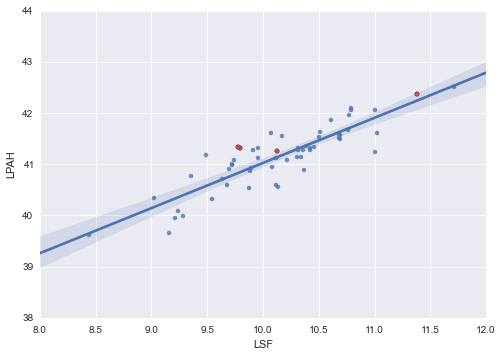

In [97]:
sn.regplot(np.log10(bat_casey['LSF'][bat_casey['LPAH'] > 0]), np.log10(bat_casey['LPAH'][bat_casey['LPAH'] > 0]))
plt.scatter(np.log10(bat_casey['LSF'][ind_out_sb]), np.log10(bat_casey['LPAH'][ind_out_sb]), c='r')

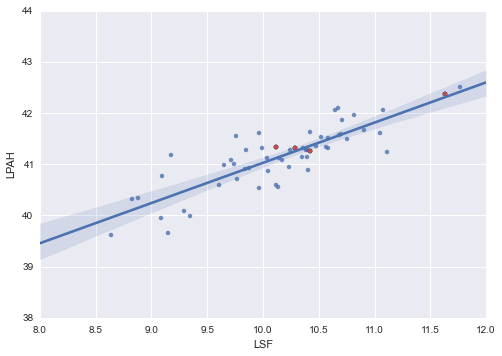

In [100]:
sn.regplot(bat_decompir['LSF'][bat_decompir['LPAH'] > 0], np.log10(bat_decompir['LPAH'][bat_decompir['LPAH'] > 0]))
plt.scatter(bat_decompir['LSF'][ind_out_sb], np.log10(bat_decompir['LPAH'][ind_out_sb]), c='r')

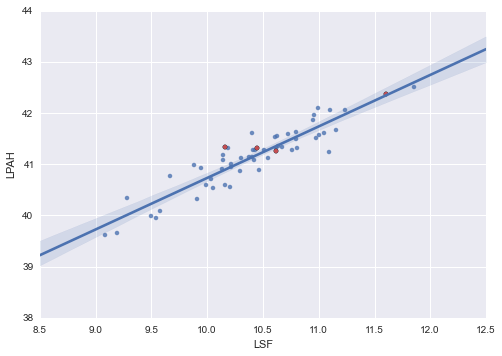

In [102]:
sn.regplot(bat_dale14['LSF'][bat_dale14['LPAH'] > 0], np.log10(bat_dale14['LPAH'][bat_dale14['LPAH'] > 0]))
plt.scatter(bat_dale14['LSF'][ind_out_sb], np.log10(bat_dale14['LPAH'][ind_out_sb]), c='r')

So it looks like just like we find when we compare the AGN IR luminosity to the X-ray luminosity, that the sources that show the largest difference in AGN fractions are having their AGN fractions overestimated in the Casey model based on the correlation between the FIR star-forming luminosity and NeII and PAH luminosity.

This also leads to my next investigation which is the overall correlation between NeII, PAH and our star-forming luminosity. But first lets look at the correlation between the lines and the total luminosity before subtracting out the AGN.

In [140]:
casey_neII_ltot_cc = pearsonr(bat_casey['lir_total'][~pd.isnull(bat_casey['LNeII'])], np.log10(bat_casey['LNeII'][~pd.isnull(bat_casey['LNeII'])]))
casey_pah_ltot_cc = pearsonr(bat_casey['lir_total'][bat_casey['LPAH'] > 0], np.log10(bat_casey['LPAH'][bat_casey['LPAH'] > 0]))

decompir_neII_ltot_cc = pearsonr(bat_decompir['lir_total'][np.isfinite(bat_decompir['LNeII'])], np.log10(bat_decompir['LNeII'][np.isfinite(bat_decompir['LNeII'])]))
decompir_pah_ltot_cc = pearsonr(bat_decompir['lir_total'][bat_decompir['LPAH'] > 0], np.log10(bat_decompir['LPAH'][bat_decompir['LPAH'] > 0]))

dale14_neII_ltot_cc = pearsonr(bat_dale14['lir_total'][np.isfinite(bat_dale14['LNeII'])], np.log10(bat_dale14['LNeII'][np.isfinite(bat_dale14['LNeII'])]))
dale14_pah_ltot_cc = pearsonr(bat_dale14['lir_total'][bat_dale14['LPAH'] > 0], np.log10(bat_dale14['LPAH'][bat_dale14['LPAH'] > 0]))


In [141]:
print 'Casey 2012 Model:'
print 'Ltotal vs. NeII: ', casey_neII_ltot_cc[0]
print 'Ltotal vs. PAH: ', casey_pah_ltot_cc[0]
print''
print 'DecompIR Model:'
print 'Ltotal vs. NeII: ', decompir_neII_ltot_cc[0]
print 'Ltotal vs. PAH: ', decompir_pah_ltot_cc[0]
print''
print 'Dale 2014 Model:'
print 'Ltotal vs. NeII: ', dale14_neII_ltot_cc[0]
print 'Ltotal vs. PAH: ', dale14_pah_ltot_cc[0]

Casey 2012 Model:
Ltotal vs. NeII:  0.865286789863
Ltotal vs. PAH:  0.919468947476

DecompIR Model:
Ltotal vs. NeII:  0.860507012719
Ltotal vs. PAH:  0.920330421378

Dale 2014 Model:
Ltotal vs. NeII:  0.857324962058
Ltotal vs. PAH:  0.900893629082


So in general the total IR luminosity is quite correlated in a linear fashion to both the NeII and PAH luminosity. Let's see if the correlation gets better after removing what we think is the AGN componenet.

In [136]:
casey_neII_lsf_cc = pearsonr(bat_casey['LSF'][np.isfinite(bat_casey['LNeII'])], np.log10(bat_casey['LNeII'][np.isfinite(bat_casey['LNeII'])]))
casey_pah_lsf_cc = pearsonr(bat_casey['LSF'][bat_casey['LPAH'] > 0], np.log10(bat_casey['LPAH'][bat_casey['LPAH'] > 0]))

decompir_neII_lsf_cc = pearsonr(bat_decompir['LSF'][np.isfinite(bat_decompir['LNeII'])], np.log10(bat_decompir['LNeII'][np.isfinite(bat_decompir['LNeII'])]))
decompir_pah_lsf_cc = pearsonr(bat_decompir['LSF'][bat_decompir['LPAH'] > 0], np.log10(bat_decompir['LPAH'][bat_decompir['LPAH'] > 0]))

dale14_neII_lsf_cc = pearsonr(bat_dale14['LSF'][np.isfinite(bat_dale14['LNeII'])], np.log10(bat_dale14['LNeII'][np.isfinite(bat_dale14['LNeII'])]))
dale14_pah_lsf_cc = pearsonr(bat_dale14['LSF'][bat_dale14['LPAH'] > 0], np.log10(bat_dale14['LPAH'][bat_dale14['LPAH'] > 0]))

In [142]:
print 'Casey 2012 Model:'
print 'LSF vs. NeII: ', casey_neII_lsf_cc[0]
print 'LSF vs. PAH: ', casey_pah_lsf_cc[0]
print''
print 'DecompIR Model:'
print 'LSF vs. NeII: ', decompir_neII_lsf_cc[0]
print 'LSF vs. PAH: ', decompir_pah_lsf_cc[0]
print''
print 'Dale 2014 Model:'
print 'LSF vs. NeII: ', dale14_neII_lsf_cc[0]
print 'LSF vs. PAH: ', dale14_pah_lsf_cc[0]

Casey 2012 Model:
LSF vs. NeII:  0.59531035158
LSF vs. PAH:  0.561022044373

DecompIR Model:
LSF vs. NeII:  0.69658348867
LSF vs. PAH:  0.842482688261

Dale 2014 Model:
LSF vs. NeII:  0.840995377456
LSF vs. PAH:  0.923303568794


So it looks like if we assume that the PAH emission is correctly following the SFR, then the Dale 2014 model is the best model that decomposes the SED into star-forming and AGN components given that the correlation between LSF and PAH actually improves upon the correlation between Ltotal and PAH. Let's look at the plots of the correlations themselves.

(38.5, 43.0)

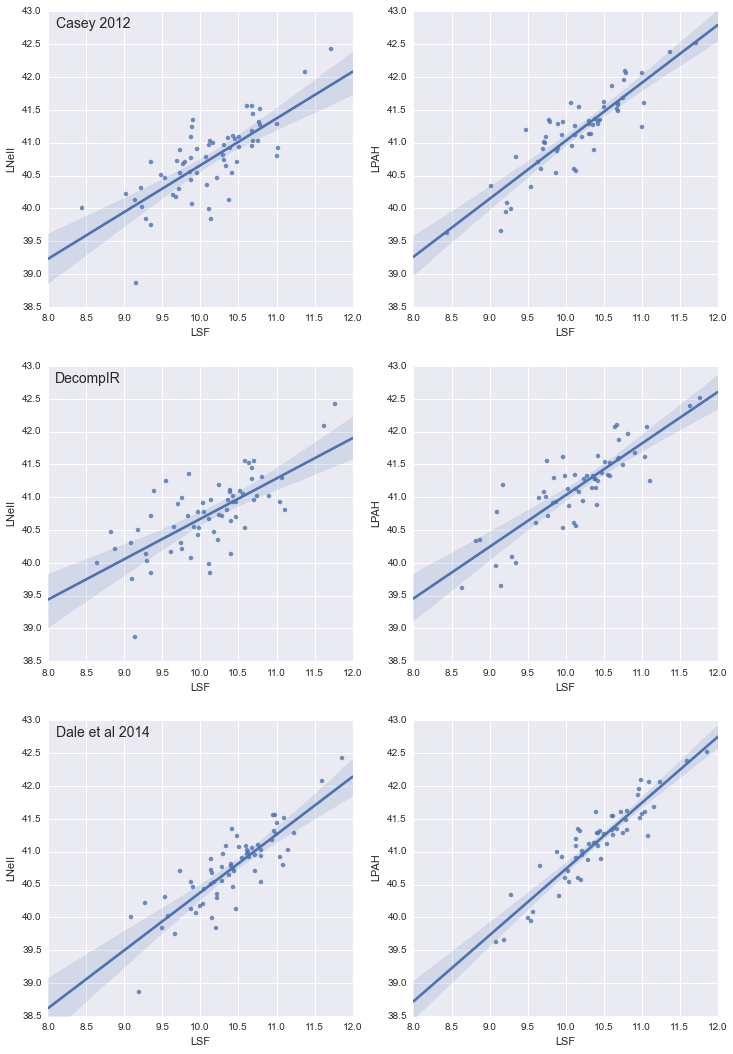

In [164]:
fig = plt.figure(figsize=(12, 18))

ax1 = fig.add_subplot(321)
sn.regplot(x=np.log10(bat_casey['LSF']), y=np.log10(bat_casey['LNeII']))
ax1.text(8.1, 42.75, 'Casey 2012', fontsize=14)

ax2 = fig.add_subplot(322)
sn.regplot(x=np.log10(bat_casey['LSF'][bat_casey['LPAH'] > 0]), y=np.log10(bat_casey['LPAH'][bat_casey['LPAH'] > 0]))
ax2.set_ylim(38.5, 43.0)

ax3 = fig.add_subplot(323)
sn.regplot(x=bat_decompir['LSF'], y=np.log10(bat_decompir['LNeII']))
ax3.text(8.1, 42.75, 'DecompIR', fontsize=14)

ax4 = fig.add_subplot(324)
sn.regplot(x=bat_decompir['LSF'][bat_decompir['LPAH'] > 0], y=np.log10(bat_decompir['LPAH'][bat_decompir['LPAH'] > 0]))
ax4.set_ylim(38.5, 43.0)

ax5 = fig.add_subplot(325)
ax5.set_xlim(8.0, 12.0)
sn.regplot(x=bat_dale14['LSF'], y=np.log10(bat_dale14['LNeII']))
ax5.text(8.1, 42.75, 'Dale et al 2014', fontsize=14)
ax5.set_ylim(38.5, 43.0)

ax6 = fig.add_subplot(326)
ax6.set_xlim(8.0, 12.0)
sn.regplot(x=bat_dale14['LSF'][bat_dale14['LPAH'] > 0], y=np.log10(bat_dale14['LPAH'][bat_dale14['LPAH'] > 0]))
ax6.set_ylim(38.5, 43.0)